In [1]:
!pip install bambi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 5.6 MB/s eta 0:00:00


Import scottish hills race data. The Distance is how far the race is in miles. The climb is the difference in height from the end to the beginning. The Time is how long it took to finish.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


hills = pd.read_table("http://www.statsci.org/data/general/hills.txt")
hills

,Race,Distance,Climb,Time
0,Greenmantle,2.5,650,16.083
1,Carnethy,6.0,2500,48.350
2,CraigDunain,6.0,900,33.650
3,BenRha,7.5,800,45.600
4,BenLomond,8.0,3070,62.267
5,Goatfell,8.0,2866,73.217
6,BensofJura,16.0,7500,204.617
7,Cairnpapple,6.0,800,36.367
8,Scolty,5.0,800,29.750
9,Traprain,6.0,650,39.750


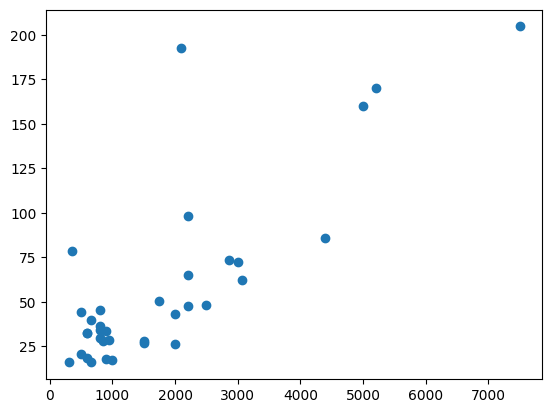

In [4]:

plt.scatter(hills.Climb,hills.Time)

Build a Bayesian linear model using distance to predict time. Running up hill, how much longer would you expect to take for one additional mile?

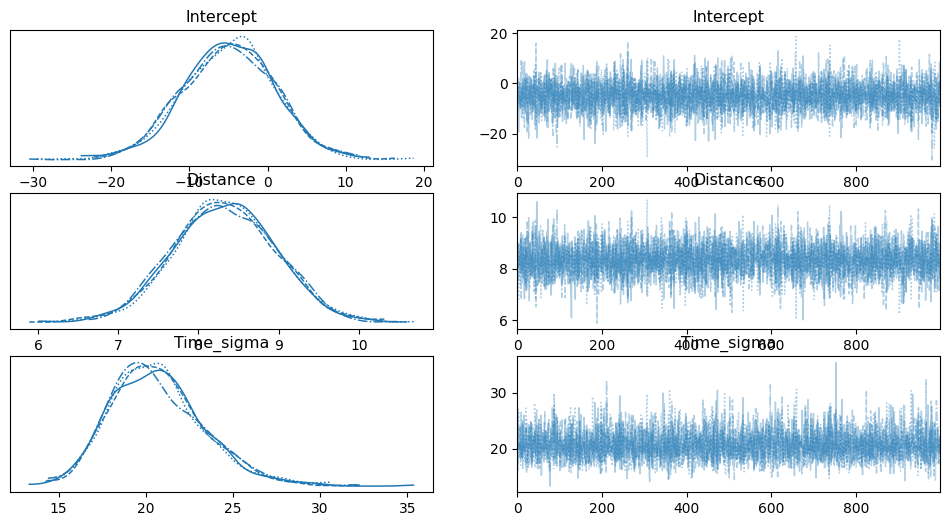

In [5]:
import bambi as bmb
import arviz as az

# Initialize a Bayesian linear model
model = bmb.Model('Time ~ Distance',hills)

priors = {
"Intercept": bmb.Prior("Normal", mu=0, sigma=100),
"Distance": bmb.Prior("Normal", mu=7, sigma=5)
}
model.set_priors(priors=priors)
# Fit the model, do 4 different series of draws of length 1000
results = model.fit(draws=1000, chains=4)

# Plot the draws as a trace function and as a histogram of the draws
az.plot_trace(results)
plt.show()

In [6]:
az.summary(results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-4.937,5.899,-15.860,6.122,0.076,0.072,6129.0,3323.0,1.0
Distance,8.331,0.639,7.108,9.470,0.009,0.006,5521.0,3286.0,1.0
Time_sigma,20.666,2.672,16.153,25.933,0.041,0.030,4407.0,3086.0,1.0


In [7]:
posterior = results.posterior.stack({"draws":["chain","draw"]})
distance_post = posterior["Distance"].values
distance_post

array([9.03974752, 8.05614911, 8.02726651, ..., 8.05294347, 8.39418034,
       8.07580388])

In [8]:
intercept_post = posterior["Intercept"].values
intercept_post

array([-7.04425556, -5.84620988, -1.73333666, ...,  0.61531435,
       -9.15462427, -1.74109351])

What is the probability the estimate for Beta_1 is more than 9? Meaning the average time added per mile is more than 9 minutes?

In [10]:
np.sum(distance_post > 9 )/len(distance_post)

0.147

Multiple variables

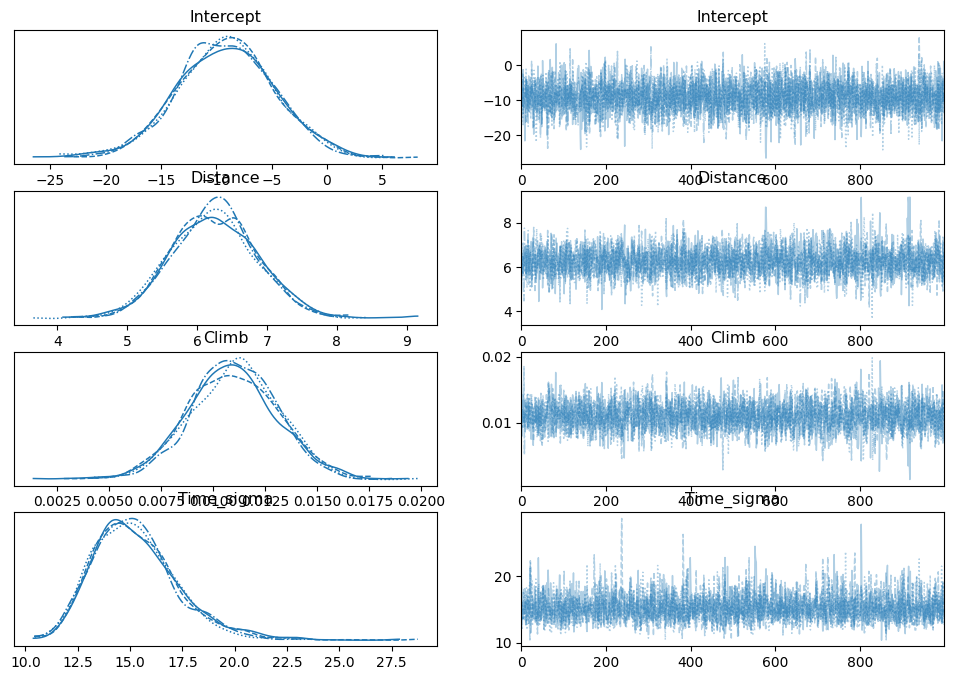

In [11]:
# Initialize a Bayesian linear model
model = bmb.Model('Time ~ Distance + Climb',hills)

priors = {
"Intercept": bmb.Prior("Normal", mu=0, sigma=100),
"Distance": bmb.Prior("Normal", mu=7, sigma=5),
"Climb": bmb.Prior("Normal", mu=.1, sigma=5)
}
model.set_priors(priors=priors)
# Fit the model, do 4 different series of draws of length 1000
results = model.fit(draws=1000, chains=4)

# Plot the draws as a trace function and as a histogram of the draws
az.plot_trace(results)
plt.show()

In [ ]:
az.summary(results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-9.041,4.603,-17.990,-0.461,0.064,0.047,5193.0,3451.0,1.0
Distance,6.223,0.636,5.067,7.396,0.012,0.009,2876.0,2409.0,1.0
Climb,0.011,0.002,0.007,0.015,0.000,0.000,2557.0,2890.0,1.0
Time_sigma,15.288,2.066,11.715,19.180,0.038,0.027,3026.0,2689.0,1.0


In [12]:
posterior = results.posterior.stack({"draws":["chain","draw"]})
distance_post = posterior["Distance"].values
distance_post

array([4.83781917, 5.53281887, 6.60614679, ..., 7.28102354, 6.43901073,
       6.77672085])

In [13]:
climb_post = posterior["Climb"].values
climb_post

array([0.01628196, 0.01377522, 0.00795172, ..., 0.00859324, 0.00729821,
       0.00781501])